In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
N = 15
m = 10
d= 4
k= 4
n = 4

Y = np.zeros((m, N))
Y_perm = np.zeros((m, N))
num_coeffs = k+2
I_N = np.eye(N)
I_m = np.eye(m)
coeffs = 10+np.arange(num_coeffs)*2

row = [1,2,6,1]
col = [1,3,8,9]

for i in range(n):
    block = np.ones((d,k))
    inds = np.random.choice(num_coeffs, k, replace=False)
    for j in range(k):
        block[:,j] = coeffs[inds[j]]*block[:,j]
    # Non-permutated   
    base = np.zeros((m,N))
    base[row[i]:row[i]+d, col[i]:col[i]+k] = block
    Y += base
    
    # Permute the rows and columns of each block independently and randomly
    P_col = np.zeros((N,N))
    order_col = np.random.choice(N,N)    
    for l in range(N):
        P_col[l,:] = I_N[order_col[l],:]
        
    P_row = np.zeros((m,m))
    order_row = np.random.choice(m,m)
    for l in range(m):
        P_row[l,:] = I_m[order_row[l],:]
       
    Y_perm += P_row@base@P_col
    
    

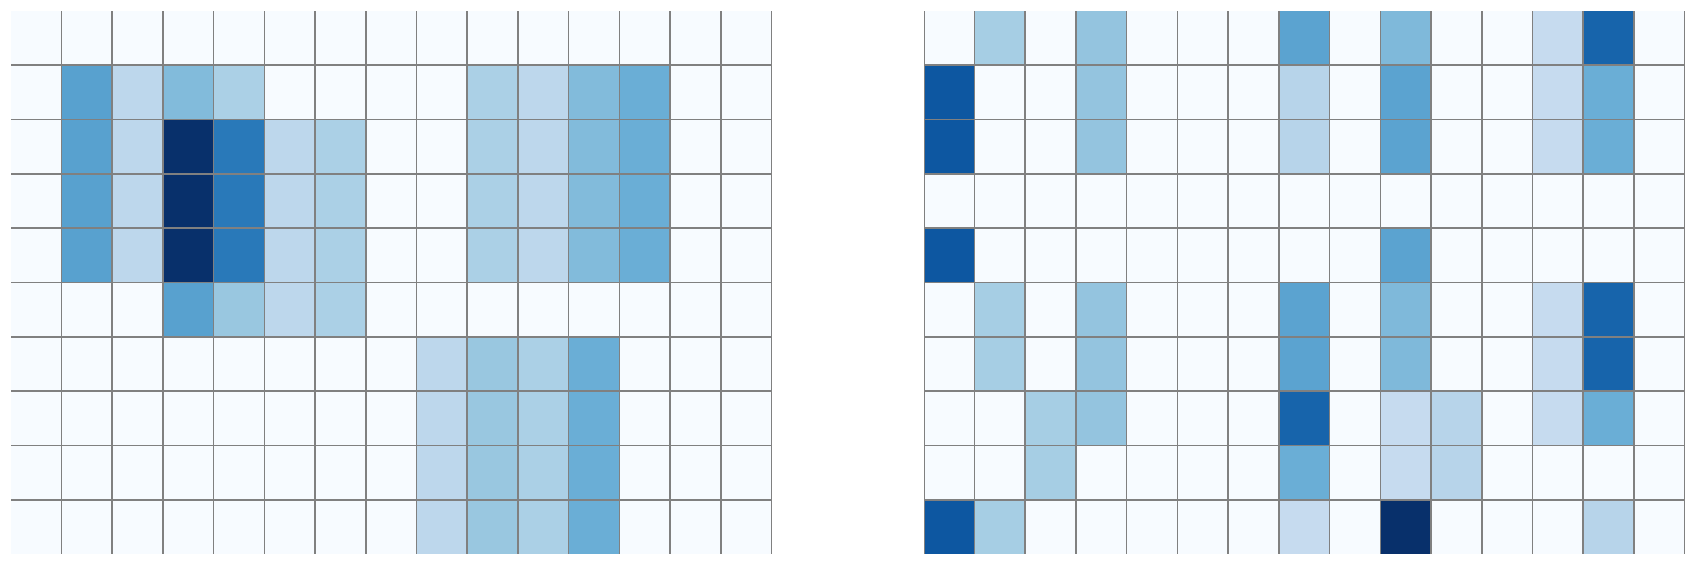

In [172]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
sns.heatmap(Y, cmap="Blues", yticklabels=False, xticklabels=False, linewidth=0.5, ax=ax1, cbar=False, linecolor="grey")
sns.heatmap(Y_perm, cmap="Blues", yticklabels=False, xticklabels=False, linewidth=0.5, ax=ax2, cbar=False, linecolor="grey")
plt.show()


In [173]:
fig.savefig('./figures_ACHA/model_Y.eps', format='eps', bbox_inches='tight')